# Data visualisation

### Activity Recognition in Pervasive Smart Home Environments

In [1]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [10, 5]

In [7]:
fileName = "annotated.feat.ch1"
dataDir = '../Dataset/twor.2009/'
raw = pd.read_csv(dataDir+fileName)

In [8]:
raw.head()

,AD1-A,AD1-B,AD1-C,D03,D05,D07,D08,D09,D10,D12,...,M43,M44,M45,M46,M47,M48,M49,M50,M51,ActivityName
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.666667,0.0,0.0,0.0,0.0,0.0,R2_work_at_computer
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.166667,0.166667,0.166667,0.0,0.0,0.5,0.0,0.0,R2_work_at_computer
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,R2_work_at_computer
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,R2_work_at_computer
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,R2_work_at_computer


In [9]:
activity_labels = raw["ActivityName"].unique()
activity_labels

array(['R2_work_at_computer', 'R1_sleep', 'R2_sleep', 'R1_bed_to_toilet',
       'R2_bed_to_toilet', 'R1_groom', 'R2_groom', 'R1_breakfast',
       'R2_breakfast', 'R1_work_at_computer', 'R2_prepare_dinner',
       'R2_prepare_lunch', 'Cleaning', 'R1_work_at_dining_room_table',
       'R2_watch_TV', 'Wash_bathtub'], dtype=object)

In [10]:
def split_df(df, labels):
    dfs = []
    for c in labels:
        newdf = df[df["ActivityName"].isin([c])]
        dfs.append(newdf)
    return dfs

dfs = split_df(raw, activity_labels)

In [11]:
def selection(dfs, class_index):
    df = pd.DataFrame(columns=raw.columns)
    for c in class_index:
        df = pd.concat([df, dfs[c]], ignore_index=True)
    df = df.sample(frac=1).reset_index(drop=True)
    
    y = df["ActivityName"]
    x = df.drop(['ActivityName'], axis=1)
    return x, y



In [12]:
from matplotlib import colors as mcolors
colours = list(mcolors.TABLEAU_COLORS.values()) + ["red", "green", "blue", "gold", "black", "yellow"]

print(colours)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'red', 'green', 'blue', 'gold', 'black', 'yellow']


# All classes

In [38]:
np.random.seed(0)
class_index = range(len(activity_labels))
x, ally = selection(dfs, class_index)
tsne = TSNE(n_components=2, random_state=0, perplexity=100)
_allx = tsne.fit_transform(x)



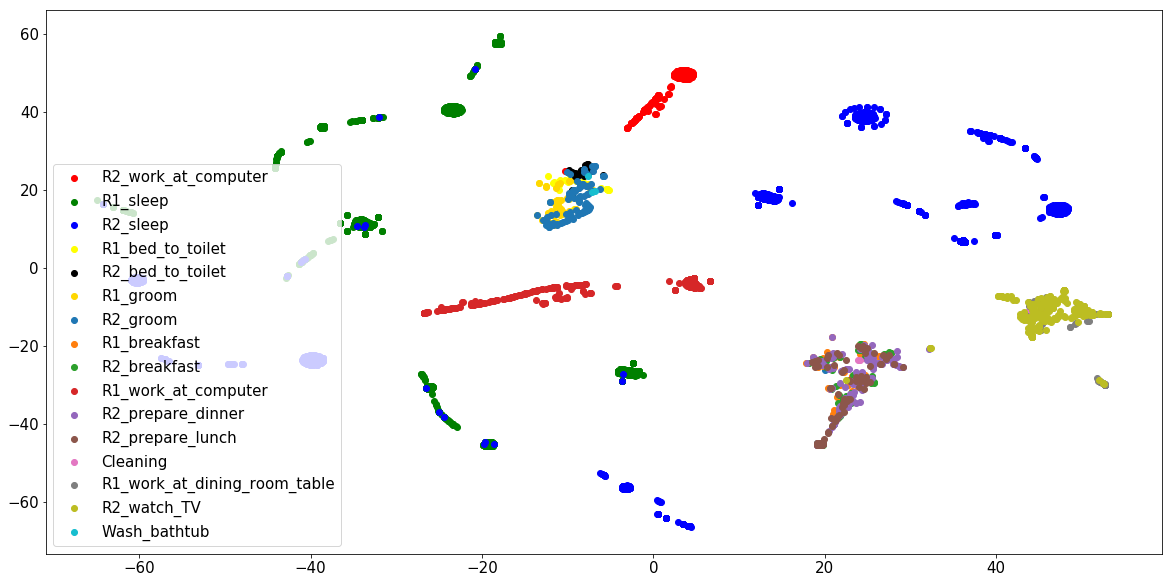

In [35]:
# perplexity=30
plotTNSE(class_index, _allx, ally)

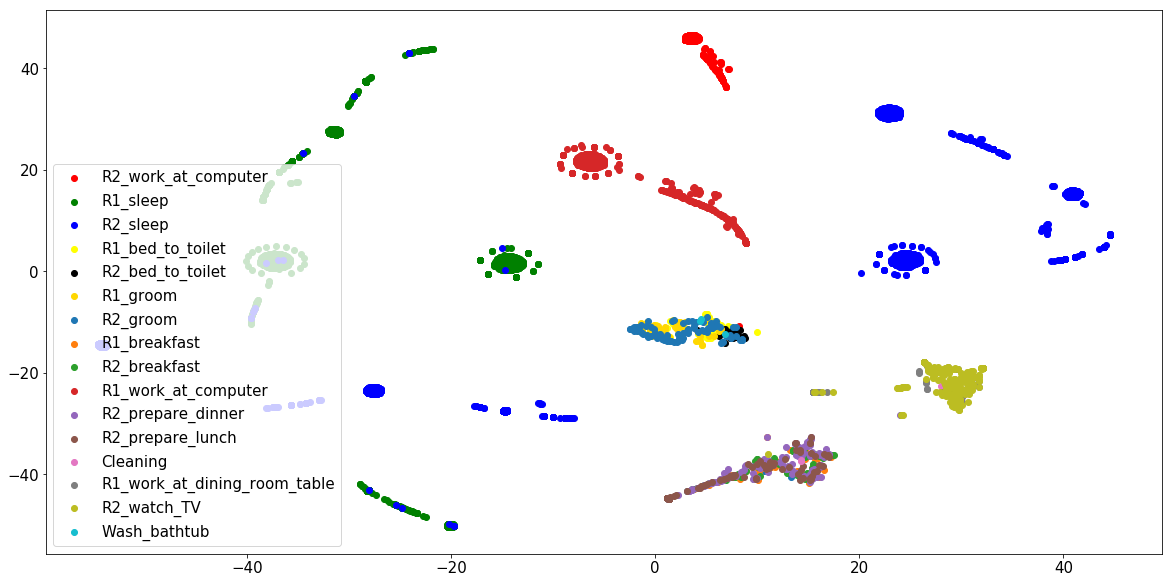

In [37]:
# perplexity=50
plotTNSE(class_index, _allx, ally)

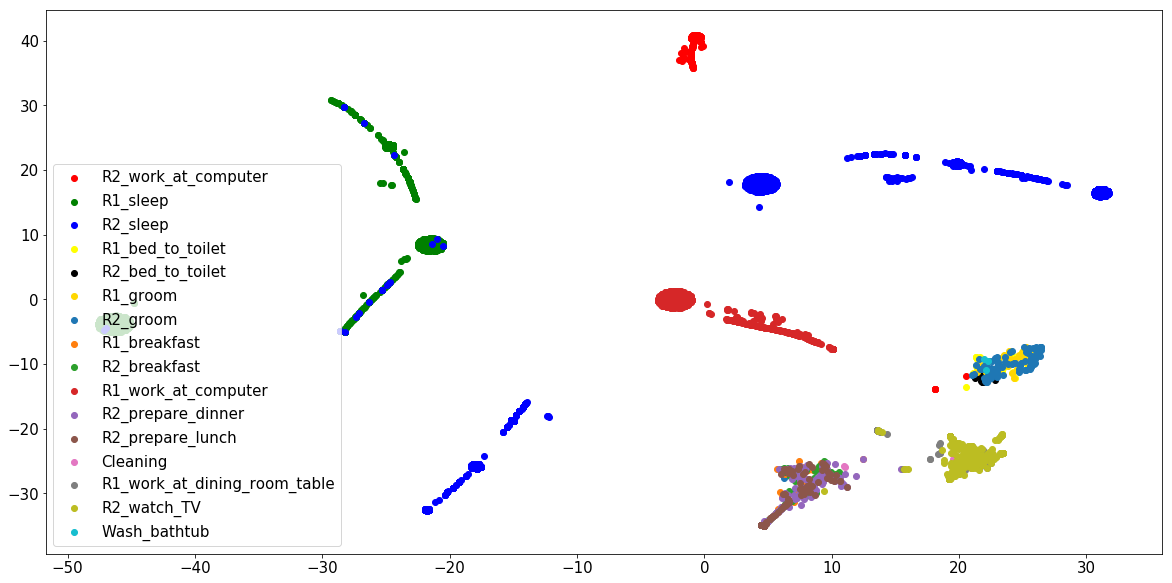

In [39]:
# perplexity=100
plotTNSE(class_index, _allx, ally)

# Overlapped activity

In [10]:
for i, v in enumerate(activity_labels):
    print(i, v)

0 R2_work_at_computer
1 R1_sleep
2 R2_sleep
3 R1_bed_to_toilet
4 R2_bed_to_toilet
5 R1_groom
6 R2_groom
7 R1_breakfast
8 R2_breakfast
9 R1_work_at_computer
10 R2_prepare_dinner
11 R2_prepare_lunch
12 Cleaning
13 R1_work_at_dining_room_table
14 R2_watch_TV
15 Wash_bathtub


In [14]:
class_index = [10, 11, 14, 13]
print(activity_labels[class_index])


np.random.seed(0)
x, y = selection(dfs, class_index)
tsne = TSNE(n_components=2, random_state=0, perplexity=50)
x_ = tsne.fit_transform(x)

['R2_prepare_dinner' 'R2_prepare_lunch' 'R2_watch_TV'
 'R1_work_at_dining_room_table']


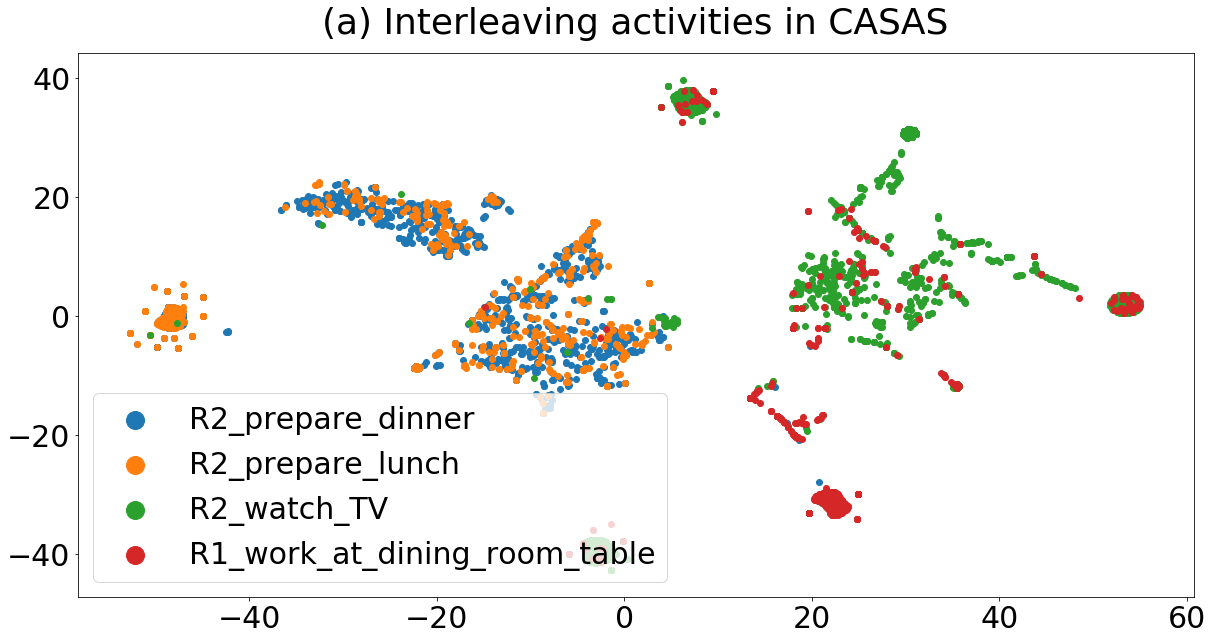

In [40]:
def plotTNSE(class_index, x_, y, title=""):
    np.random.seed(0)
    
    fout = plt.figure()
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['axes.titlepad'] = 20 
    plt.rcParams.update({'font.size': 30})
    
    label_colours = colours[0: len(class_index)] #np.random.choice(colours, len(class_index), replace=False)
    
    for i, cid in enumerate(class_index):
        px = x_[(y==activity_labels[cid])]
        plt.scatter(px[:, 0], px[:, 1], c=label_colours[i], label=activity_labels[cid])
    
    plt.title(title)
    lgnd = plt.legend(prop={'size': 30}, loc=3,  markerscale=3)
    
    plt.show()
    
    fout.savefig("foo.pdf", bbox_inches='tight')
    
plotTNSE(class_index, x_, y, "(a) Interleaving activities in CASAS")

# Non-overlapped

In [44]:
class_index = [1, 3]
print(activity_labels[class_index])


np.random.seed(0)
x, y = selection(dfs, class_index)
tsne = TSNE(n_components=2, random_state=0)
x_ = tsne.fit_transform(x)

['R1_sleep' 'R1_bed_to_toilet']


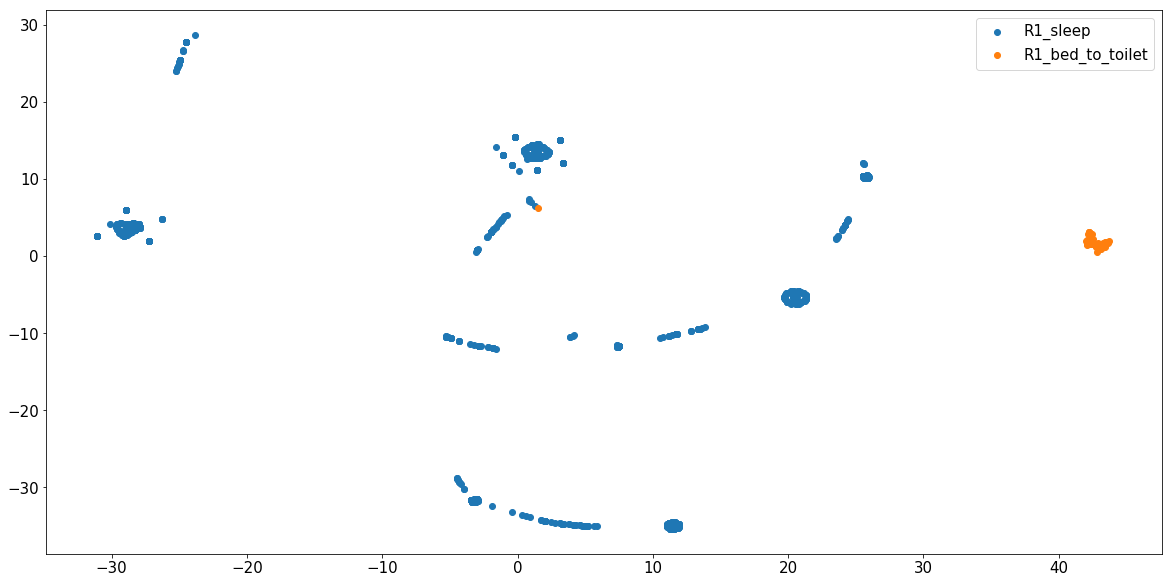

In [45]:
plotTNSE(class_index, x_, y)

# Sample from GANs

In [50]:
fileName = "fake_sample_modelmp-gan_iter1000-1000.feat"
dataDir = '../Results/Samples/'
raw_f = pd.read_csv(dataDir+fileName)

def map_label(r):
    classes = [
        "R1_work_at_computer",
        "R2_work_at_computer",
        "R1_sleep",
        "R2_sleep",
        "R1_bed_to_toilet",
        "R2_bed_to_toilet",

        "R2_prepare_dinner",
        "R2_watch_TV",

        "R2_prepare_lunch",
        "R1_work_at_dining_room_table"
    ]
    return classes[int(r["ActivityName"])]

raw_f["ActivityName"] = raw_f.apply(map_label, axis=1)
dfs_f = split_df(raw_f, activity_labels)

In [66]:
def plotTNSE2(x_, y):
    np.random.seed(0)
    plt.rcParams['figure.figsize'] = [20, 10]
    
    plt.rcParams.update({'font.size': 15})
    label_colours = ["red", "blue"]

    for i, cid in enumerate(["real", "generated"]):
        px = x_[(y==cid)]
        plt.scatter(px[:, 0], px[:, 1], c=label_colours[i], label=cid)
        
    plt.legend(prop={'size': 20})
    plt.show()
    

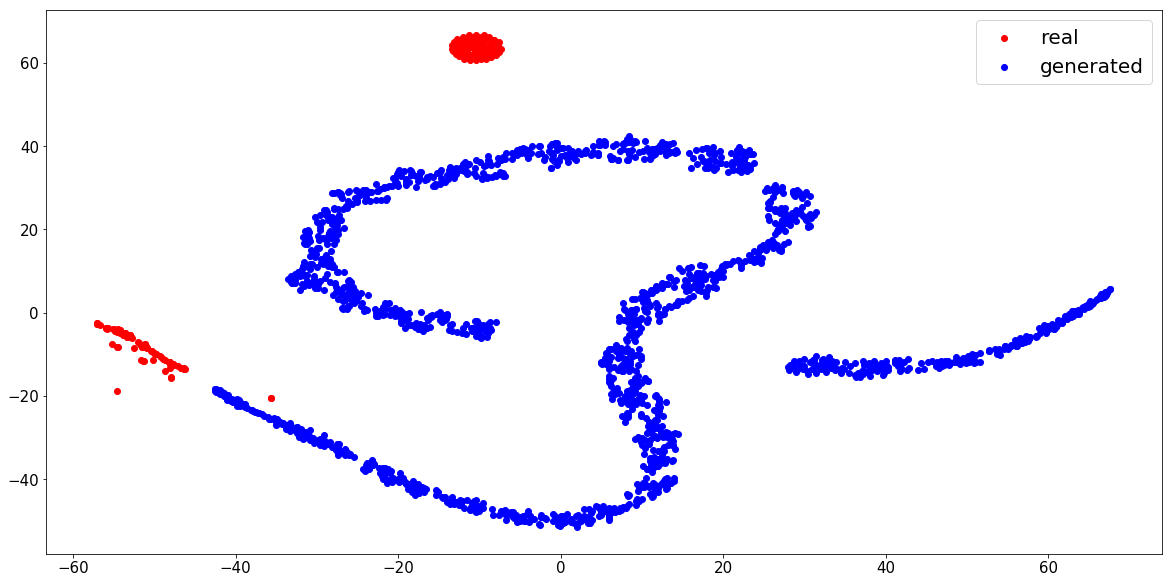

In [67]:
class_index = [0]
np.random.seed(0)
x, y = selection(dfs, class_index)
_x, _y = selection(dfs_f, class_index)

X = pd.concat([x, _x])
y = y.replace(y[0], "real")
_y =  _y.replace(_y[0], "generated")
Y = pd.concat([y, _y])

tsne = TSNE(n_components=2, random_state=0)
X_ = tsne.fit_transform(X)
plotTNSE2(X_, Y)

In [68]:
class_index = [1]
np.random.seed(0)
x, y = selection(dfs, class_index)
_x, _y = selection(dfs_f, class_index)

X = pd.concat([x, _x])
y = y.replace(y[0], "real")
_y =  _y.replace(_y[0], "generated")
Y = pd.concat([y, _y])

tsne = TSNE(n_components=2, random_state=0)
X_ = tsne.fit_transform(X)

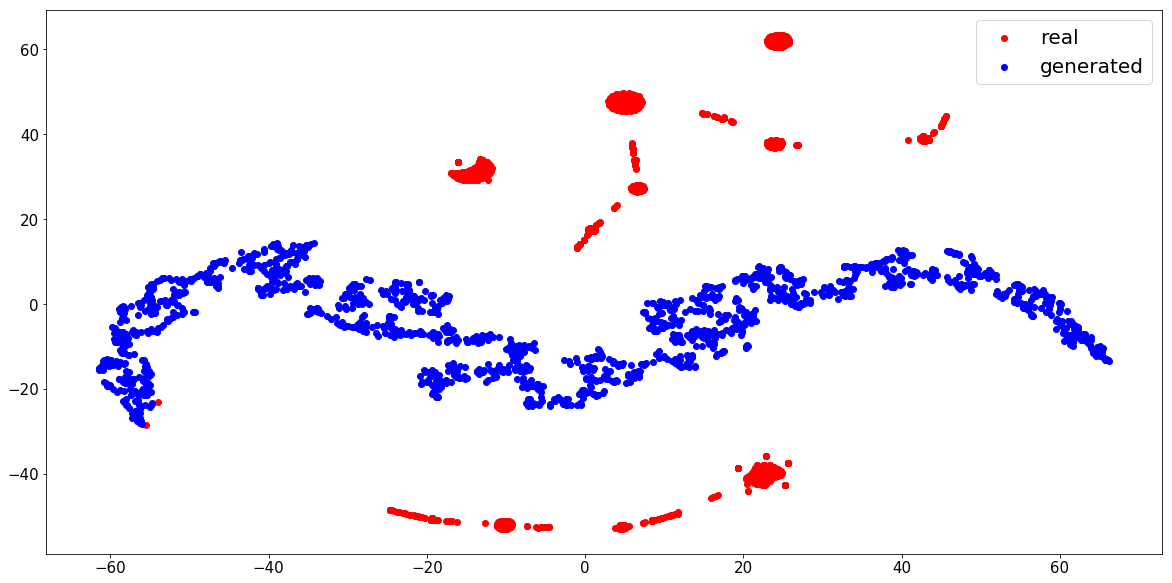

In [69]:
plotTNSE2(X_, Y)

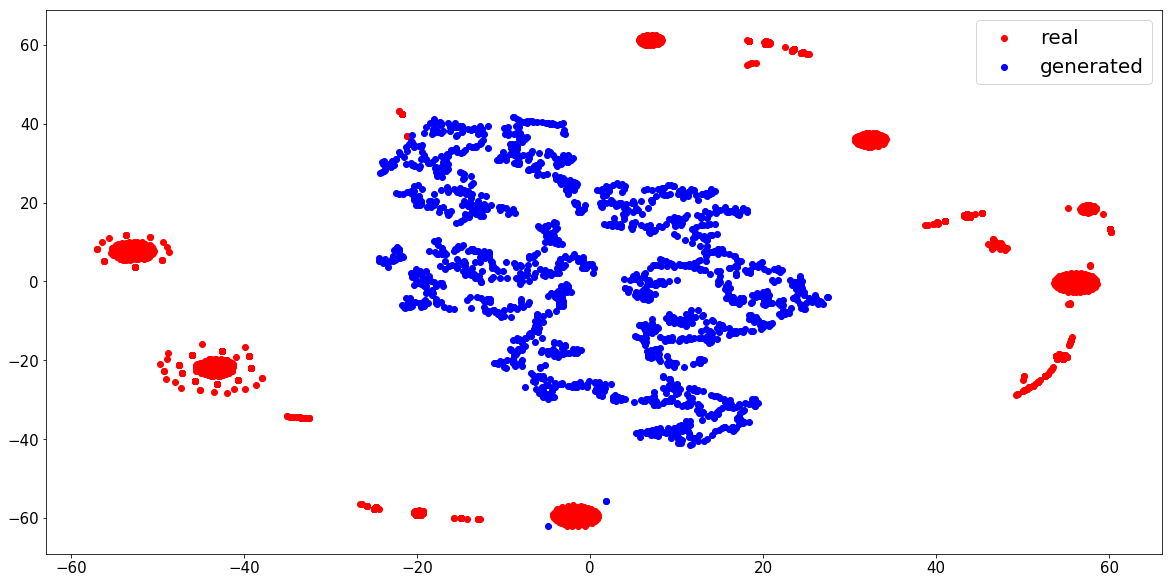

In [70]:
class_index = [2]
np.random.seed(0)
x, y = selection(dfs, class_index)
_x, _y = selection(dfs_f, class_index)

X = pd.concat([x, _x])
y = y.replace(y[0], "real")
_y =  _y.replace(_y[0], "generated")
Y = pd.concat([y, _y])

tsne = TSNE(n_components=2, random_state=0)
X_ = tsne.fit_transform(X)
plotTNSE2(X_, Y)

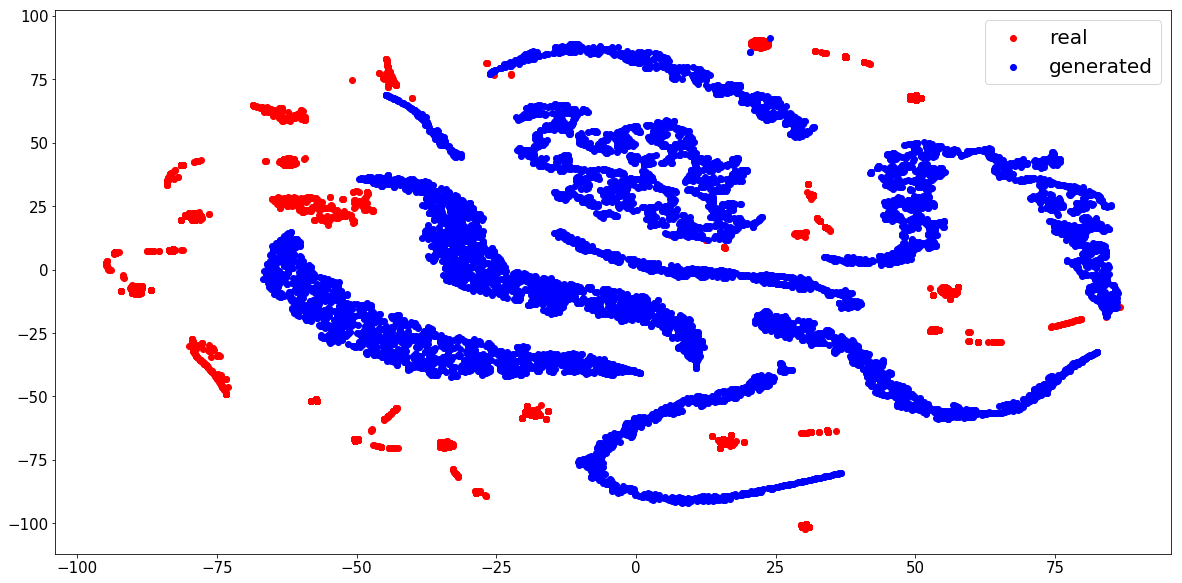

In [71]:
class_index = [0,1,2,3,4,5,6,7,8,9]
np.random.seed(0)
x, y = selection(dfs, class_index)
_x, _y = selection(dfs_f, class_index)

X = pd.concat([x, _x])
y = pd.Series(["real"]*len(y))
_y = pd.Series(["generated"]*len(_y))
             
Y = pd.concat([y, _y])

tsne = TSNE(n_components=2, random_state=0)
X_ = tsne.fit_transform(X)
plotTNSE2(X_, Y)

In [72]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=0)
X_res, Y_res = rus.fit_resample(X, Y)

tsne = TSNE(n_components=2, random_state=0)
X_res_ = tsne.fit_transform(X_res)



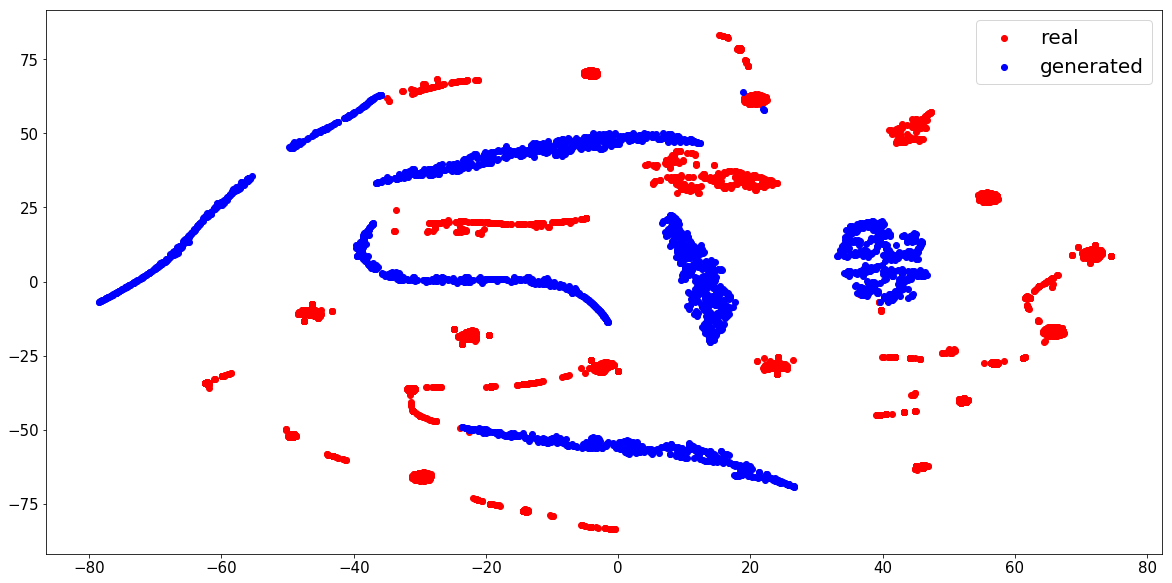

In [73]:
plotTNSE2(X_res_, Y_res)